In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import dataset
data = pd.read_csv("./dataset/heart.csv")

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
data.drop_duplicates(subset=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:>

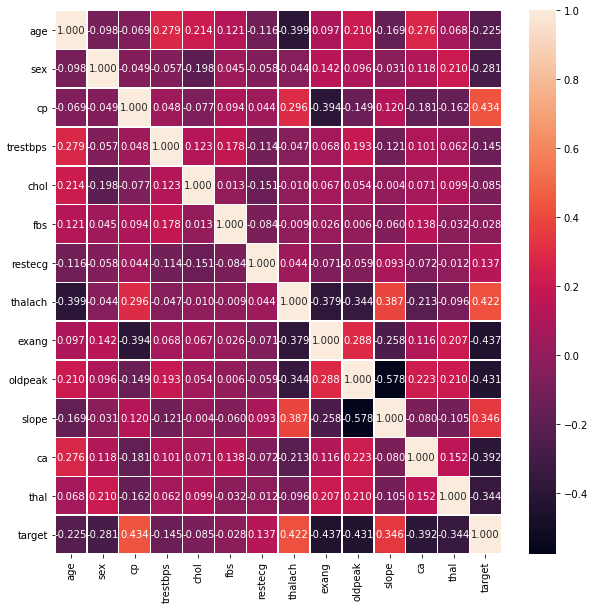

In [45]:
cor_mat=data.corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

In [27]:
X = data.loc[:,data.columns!='target']

In [28]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [36]:
Y = data.iloc[:,-1]

In [37]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the Classifier/fitting the model
gnb.fit(x_train, y_train)

GaussianNB()

In [41]:
#  to show the accuracy of model 
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

print("Naive Bayes Model Accuracy: ", nb_model.score(x_test, y_test))

Naive Bayes Model Accuracy:  0.8351648351648352


<AxesSubplot:>

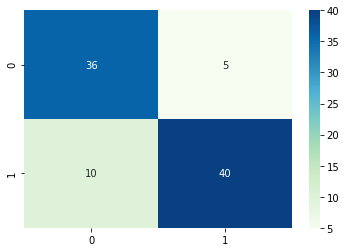

In [42]:
from sklearn.metrics import confusion_matrix

# Confusion matrix to be sure the data is correct 
y_pred = gnb.predict(x_test)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True, cmap="GnBu") 

In [44]:
# Save model
import pickle
f = open('heart-dieases.pickle', 'wb')
pickle.dump(nb_model, f)
f.close()